In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from model import PanicModel
from agent import PanicAgent2
from tqdm.notebook import tqdm


# Experiment 1
### Vary number of agents

In [78]:
num_agents_cv = np.arange(100, 1000, 10)
max_group_size = 5
num_repetitions = 100
max_iter = 1000

In [79]:
data = {
    "panic_mean": [],
    "panic_var": [],
    "panic_max": [],
    "num_agents": [],
    "max_group_size": [],
    "mean_group_size": [],
}

for num_agents in tqdm(num_agents_cv):

    model_params = {
        "N": num_agents,
        "width": 10,
        "height": 10,
        "min_group_size": 1,
        "max_group_size": max_group_size,
        "resilience": 3,
        "mean_radius": 0.5,
    }

    model = PanicModel(**model_params)


    for j in range(num_repetitions):
        for i in range(max_iter):
            model.step()

            if not len(model.schedule.agents):
                break

        # collect data
        model_data = model.datacollector.get_model_vars_dataframe()
    
        data["panic_mean"].append(model_data.panic.mean())
        data["panic_var"].append(model_data.panic.var())
        data["panic_max"].append(model_data.panic.max())
        data["num_agents"].append(num_agents)
        data["max_group_size"].append(max_group_size)
        data["mean_group_size"].append(
            np.mean([len(group) for group in model.friend_groups])
        )

  0%|          | 0/90 [00:00<?, ?it/s]

In [80]:
data = pd.DataFrame(data)

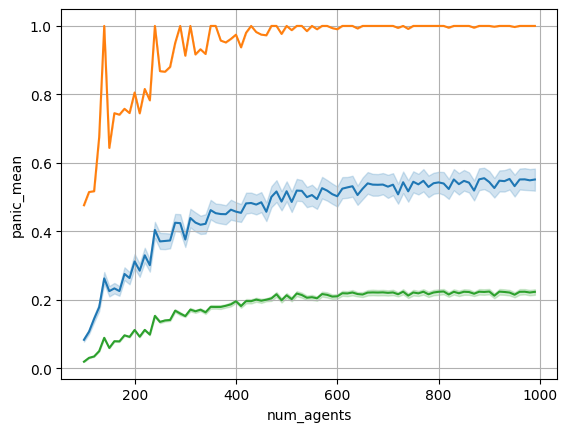

In [81]:
sns.lineplot(data=data, x="num_agents", y="panic_mean")
sns.lineplot(data=data, x="num_agents", y="panic_max")
sns.lineplot(data=data, x="num_agents", y="panic_var")
plt.grid()

# Experiment 2
### Vary the max group size

In [97]:
num_agents = 200
max_group_size_cv = np.arange(5, 100, 5)
max_iter = 1000
num_repetitions = 100


In [98]:
data = {
    "panic_mean": [],
    "panic_var": [],
    "panic_max": [],
    "num_agents": [],
    "max_group_size": [],
    "mean_group_size": [],
}

for max_group_size in tqdm(max_group_size_cv):

    model_params = {
        "N": num_agents,
        "width": 10,
        "height": 10,
        "min_group_size": 1,
        "max_group_size": max_group_size,
        "resilience": 3,
        "mean_radius": 0.5,
    }

    model = PanicModel(**model_params)


    for j in range(num_repetitions):
        for i in range(max_iter):
            model.step()

            if not len(model.schedule.agents):
                break

        # collect data
        model_data = model.datacollector.get_model_vars_dataframe()
    
        data["panic_mean"].append(model_data.panic.mean())
        data["panic_var"].append(model_data.panic.var())
        data["panic_max"].append(model_data.panic.max())
        data["num_agents"].append(num_agents)
        data["max_group_size"].append(max_group_size)
        data["mean_group_size"].append(
            np.mean([len(group) for group in model.friend_groups])
        )


  0%|          | 0/19 [00:00<?, ?it/s]

In [99]:
data = pd.DataFrame(data)

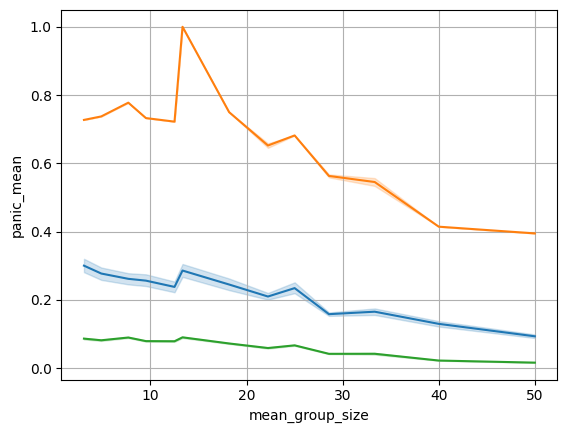

In [100]:
sns.lineplot(data=data, x="mean_group_size", y="panic_mean")
sns.lineplot(data=data, x="mean_group_size", y="panic_max")
sns.lineplot(data=data, x="mean_group_size", y="panic_var")
plt.grid()

# Experiment 3
### Vary the min group size

In [101]:
num_agents = 200
min_group_size_cv = np.arange(1, 30, 1)
max_group_size = 30
max_iter = 1000
num_repetitions = 100


In [102]:
data = {
    "panic_mean": [],
    "panic_var": [],
    "panic_max": [],
    "num_agents": [],
    "max_group_size": [],
    "mean_group_size": [],
}

for min_group_size in tqdm(min_group_size_cv):

    model_params = {
        "N": num_agents,
        "width": 10,
        "height": 10,
        "min_group_size": min_group_size,
        "max_group_size": max_group_size,
        "resilience": 3,
        "mean_radius": 0.5,
    }

    model = PanicModel(**model_params)


    for j in range(num_repetitions):
        for i in range(max_iter):
            model.step()

            if not len(model.schedule.agents):
                break

        # collect data
        model_data = model.datacollector.get_model_vars_dataframe()
    
        data["panic_mean"].append(model_data.panic.mean())
        data["panic_var"].append(model_data.panic.var())
        data["panic_max"].append(model_data.panic.max())
        data["num_agents"].append(num_agents)
        data["max_group_size"].append(max_group_size)
        data["mevan_group_size"].append(
            np.mean([len(group) for group in model.friend_groups])
        )


  0%|          | 0/29 [00:00<?, ?it/s]

In [103]:
data = pd.DataFrame(data)

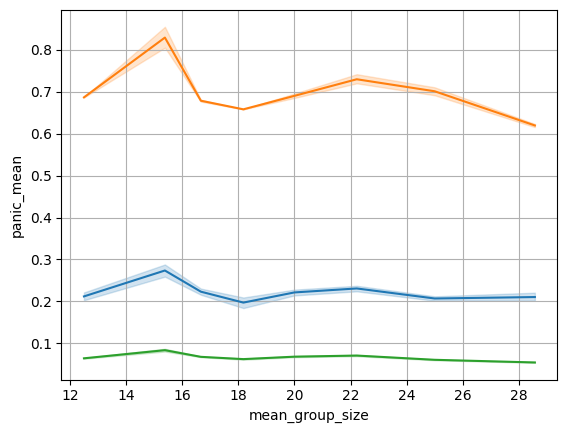

In [104]:
sns.lineplot(data=data, x="mean_group_size", y="panic_mean")
sns.lineplot(data=data, x="mean_group_size", y="panic_max")
sns.lineplot(data=data, x="mean_group_size", y="panic_var")
plt.grid()